In [42]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline


# Logistic Map

In a dynamical system, the one dimensional logistic map is defined by the following recursive function $$x_{n+1}=rx_n(1-x_n)$$ where $r$ is a parameter with $0<r\leq 4$. For values within $(0,1)$ it represents a fairly straight line, followed by a fractal pattern, which is consequently followed by chaos.

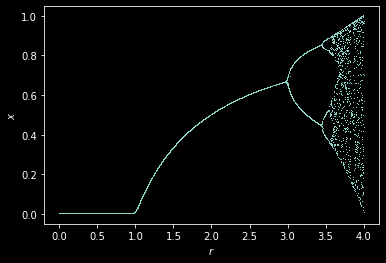

In [43]:
plt.style.use('dark_background')

fig = plt.figure(figsize=(6,4))
R = np.linspace(0, 4, 10000)

X = []
Y = []

for r in R:
    X.append(r)

    x = np.random.random()

    for n in range(100):
        x = r*x*(1-x)

    Y.append(x)

plt.xlabel('$r$')
plt.ylabel('$x$')
plt.plot(X, Y, ls='', marker=',')
plt.show()

fig.savefig('bifurcation.png', dpi=100)


# Two Dimensional Logistic Modulation Map

The Sine map is also a commonly used 1D chaotic map. It is defined by $$x_{n+1}=u\sin(\pi x_n)$$ where $u\in[0,1]$

The 2D Sine Logistic Modulation map is given by the system $$\begin{cases}x_{n+1}&=\alpha(\sin(\pi y_n)+\beta)x_n(1-x_n)\\y_{n+1}&=\alpha(\sin(\pi x_{n+1})+\beta)y_n(1-y_n)\end{cases}$$ where $\alpha$ and $\beta$ are control parameters with $\alpha\in[0,1]$ and $\beta\in[0,3]$.

The two dimensional variant of the logistic map is given by the system $\begin{cases}x_{n+1}&=r(3y_n+1)x_n(1-x_n)\\y_{n+1}&=r(3x_n+1)y_n(1-y_n)\end{cases}$

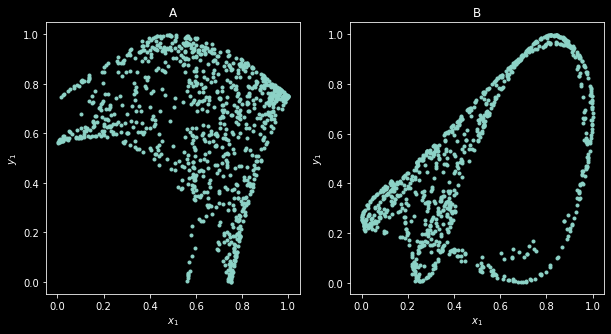

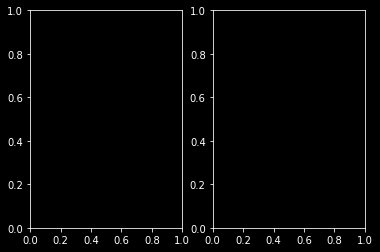

In [44]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
R = np.linspace(0, 1, 1000)

Y1 = []
Y2 = []


alpha, beta = 1, 3

for r in R:

    x = np.random.random()
    y = np.random.random()

    for n in range(1000):
        x = alpha*(np.sin(np.pi*y)+beta)*x*(1-x)
        y = alpha*(np.sin(np.pi*x)+beta)*y*(1-y)

    Y1.append(x)
    Y2.append(y)

plt.figure()
plt.subplot(1, 2, 1)
axis[0].set_title('A')
axis[0].plot(Y1, Y2, ls='', marker='.')

# ------------------------------------------------------------
r = 1.19
R = np.linspace(0, 1, 1000)

Y3 = []
Y4 = []

for i in R:

    x = np.random.random()
    y = np.random.random()

    for n in range(1000):
        x = r*(3*y+1)*x*(1-x)
        y = r*(3*x+1)*y*(1-y)

    Y3.append(x)
    Y4.append(y)

plt.subplot(1, 2, 2)
axis[1].set_title('B')
axis[1].plot(Y3, Y4, ls='', marker='.')

plt.setp(axis[0], xlabel='$x_1$')
plt.setp(axis[0], ylabel='$y_1$')

plt.setp(axis[1], xlabel='$x_1$')
plt.setp(axis[1], ylabel='$y_1$')

fig.savefig('2d_modulation.png', dpi=100)


# Circle Map

The Circle Map is a one dimensional map that maps a circle onto itself. It is given by the recursive equation $$\theta_{n+1}=\theta_n+\Omega-\dfrac{K}{2\pi}\sin(2\pi\theta_n)\pmod 1$$ where the parameter $\Omega$ is the measure of an externally applied frequency, and $K$ being the measure of strength of non linearity. 

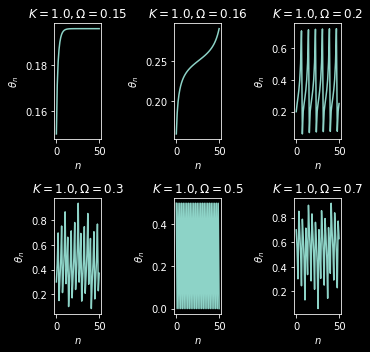

In [45]:
def theta(K, omega, t, iter):
    t_new = []
    for i in range(iter):
        t = (t+omega-K/(2*np.pi)*np.sin(2*np.pi*t)) % 1

        t_new.append(t)

    return t_new


fig = plt.figure(figsize=(5, 5))

plt.subplot(2, 3, 1)
y = theta(1, 0.15, 0, 50)
x = np.linspace(0, 50, len(y))
plt.title('$K=1.0,\Omega=0.15$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.subplot(2, 3, 2)
y = theta(1, 0.16, 0, 50)
plt.title('$K=1.0,\Omega=0.16$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.subplot(2, 3, 3)
y = theta(1, 0.2, 0, 50)
plt.title('$K=1.0,\Omega=0.2$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.subplot(2, 3, 4)
y = theta(1, 0.3, 0, 50)
plt.title('$K=1.0,\Omega=0.3$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.subplot(2, 3, 5)
y = theta(1, 0.5, 0, 50)
plt.title('$K=1.0,\Omega=0.5$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.subplot(2, 3, 6)
y = theta(1, 0.7, 0, 50)
plt.title('$K=1.0,\Omega=0.7$')
plt.xlabel('$n$')
plt.ylabel('$\u03B8_n$')
plt.plot(x, y)

plt.tight_layout()
plt.show()

fig.savefig('Circle_Map.png', dpi=300)


# Henon Map

In a dynamical system, a Henon map is an attractor map which is defined by the following function $$\begin{cases}x_{n+1}&=1-ax_n^2+y_n\\y_{n+1}&=bx_n\end{cases}$$ where $a,b$ are parameters. The classical Henon map exhibits chaotic behavior with $a=1.4,b=0.3$.

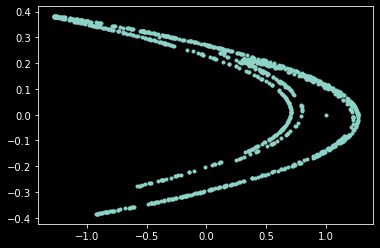

In [46]:
def Henon(a,b,x0,y0,iter):
    x,y=[],[]

    for i in range(iter):
        x_new=1-a*x0**2+y0
        y_new=b*x0

        x.append(x_new)
        y.append(y_new)

        x0,y0=x_new,y_new
    
    return x,y

a,b,x0,y0=1.4,0.3,0,0
x,y=Henon(a,b,x0,y0,1000)


plt.scatter(x,y,marker='.')